In [10]:
import pandas as pd
import matplotlib.pyplot as plot

In [38]:
# loading the csv
pokemon_df = pd.read_csv('metadata_pokemon.csv')
moves_df = pd.read_csv('metadata_pokemon_moves.csv')

# separando pelos tipos e calculando a media de attack e defense
type_stats = pokemon_df.groupby(['type_1'])[['attack','defense']].mean().round(2)

# setando o index pra o id dos pokemons 
pokemon_df.set_index(pokemon_df['id'], inplace=True)

# limpando a coluna de generation para ter somente os números romanos
moves_gen = moves_df['generation'].str.split(' ').str.get(1)

# dropar a coluna de gerações
moves_df.drop('generation', axis=1, inplace=True)

# setando a coluna de gerações no dataframe
moves_df['gen'] = moves_gen

# substuindo os valores em números romanos para interios com a função .replace
moves_df['gen'] = moves_df['gen'].replace({'I':1, 'Ii':2, 'Iii':3, 'Iv':4, 'V':5, 'Vi':6, 'Vii':7, 'Viii':8})

moves_df.stack(level=0)

moves_df

,name,id,accuracy,pp,power,priority,type,short_descripton,damage_class,gen
0,Pound,1,100.0,35,40.0,0,Normal,Inflicts regular damage with no additional eff...,Physical,1
1,Karate Chop,2,100.0,25,50.0,0,Fighting,Has an increased chance for a critical hit.,Physical,1
2,Double Slap,3,85.0,10,15.0,0,Normal,Hits 2-5 times in one turn.,Physical,1
3,Comet Punch,4,85.0,15,18.0,0,Normal,Hits 2-5 times in one turn.,Physical,1
4,Mega Punch,5,85.0,20,80.0,0,Normal,Inflicts regular damage with no additional eff...,Physical,1
...,...,...,...,...,...,...,...,...,...,...
803,Fiery Wrath,822,100.0,10,90.0,0,Dark,Inflicts regular damage with no additional eff...,Special,8
804,Thunderous Kick,823,100.0,10,90.0,0,Fighting,Inflicts regular damage with no additional eff...,Physical,8
805,Glacial Lance,824,100.0,5,130.0,0,Ice,Inflicts regular damage with no additional eff...,Physical,8
806,Astral Barrage,825,100.0,5,120.0,0,Ghost,Inflicts regular damage with no additional eff...,Special,8


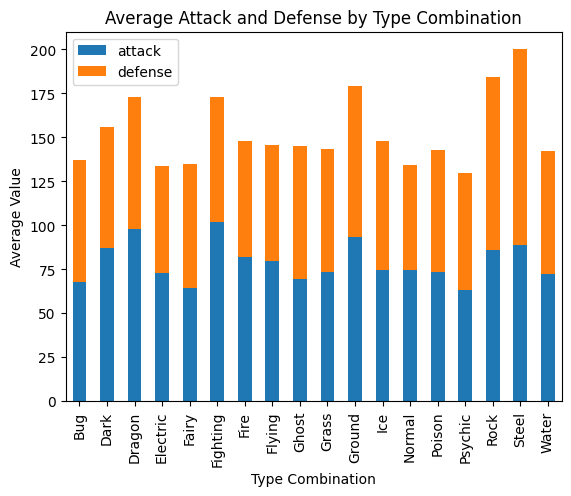

In [12]:
# Criando grafico de barras para visualizar a media dos stats por types
type_stats.plot.bar(stacked=True)

# Adicionando titulo e rotulos para os axis
plot.title('Average Attack and Defense by Type Combination')
plot.xlabel('Type Combination')
plot.ylabel('Average Value')

# Mostrar o grafico
plot.show()

In [13]:
damage_class_df = moves_df.value_counts('damage_class')
damage_class_df

damage_class
Physical    336
Status      246
Special     226
Name: count, dtype: int64

In [22]:
# Use pivot table for mean the atk and def of the type of pokemons
pokemon_df_types = pokemon_df.pivot_table(index=['type_1','type_2'], values=['attack','defense'], aggfunc='mean', margins=True).round(2)

# Sort by high value
pokemon_df_types = pokemon_df_types.sort_values(by=['attack','defense'], ascending=False)

pokemon_df_types.reset_index()

,,attack,defense
type_1,type_2,,
Dragon,Electric,150.00,120.00
Fighting,Electric,140.00,108.00
Ground,Normal,140.00,105.00
Psychic,Steel,137.00,107.00
Rock,Dark,134.00,110.00
...,...,...,...
Bug,Ground,45.00,90.00
Ice,Bug,45.00,47.50
Bug,Psychic,43.33,91.67
